# Non Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Linear

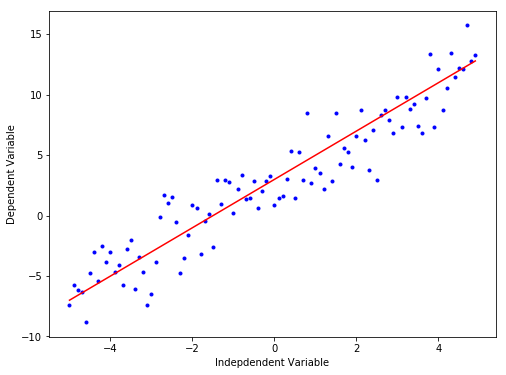

In [10]:
# simple linear

x = np.arange(-5.0, 5.0, 0.1)

# You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
y_data = y + y_noise

plt.figure(figsize=(8,6))
plt.plot(x, y_data,  'b.')
plt.plot(x, y, 'r-') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Non Linear

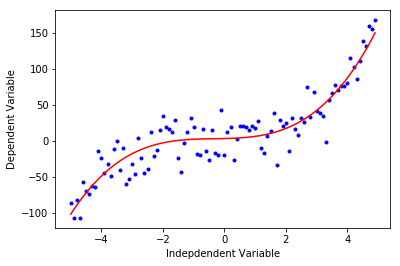

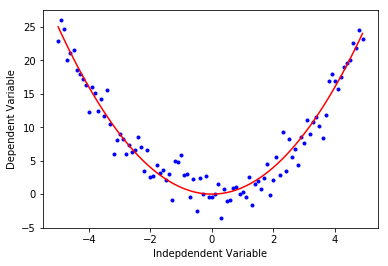

In [14]:
# polynomial

x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
y_data = y + y_noise

plt.plot(x, y_data,  'b.')
plt.plot(x,y, 'r-') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
y_data = y + y_noise

plt.plot(x, y_data,  'b.')
plt.plot(x, y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

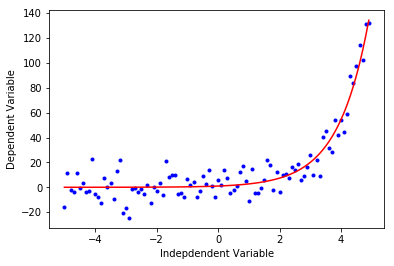

In [31]:
# Exponential

x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x)
y_noise = 10 * np.random.normal(size=x.size)
y_data = y + y_noise

plt.plot(x, y_data, 'b.') 
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


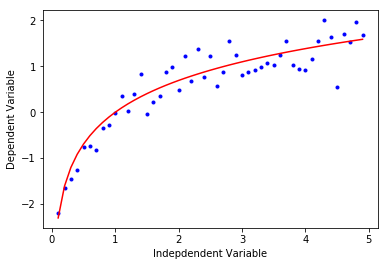

In [2]:
# Logarithmic

x = np.arange(-5.0, 5.0, 0.1)
y = np.log(x)
y_noise = 0.3 * np.random.normal(size=x.size)
y_data = y + y_noise

plt.plot(x, y_data, 'b.') 
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

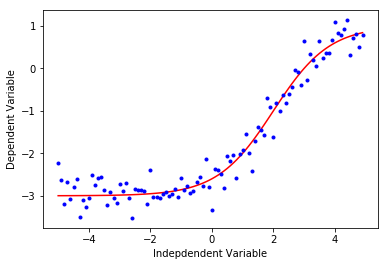

In [4]:
# sigmoidal/logistic

x = np.arange(-5.0, 5.0, 0.1)
y = 1-4/(1+np.power(3, X-2))
y_noise = 0.3 * np.random.normal(size=x.size)
y_data = y + y_noise

plt.plot(x, y, 'r')
plt.plot(x, y_data, 'b.')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Non-Linear Example

In [5]:
import numpy as np
import pandas as pd

In [6]:
def curl(path, fname, fmodel):
    """
    curl('path', 'save as', 'wb')
    """
    
    import urllib.request, urllib.parse, urllib.error
    
    file = urllib.request.urlopen(path).read()
    with open(fname, fmodel) as fhand:
        fhand.write(file)

In [7]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv'
curl(path, 'china_gdp.csv', 'wb')

In [8]:
df = pd.read_csv('china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


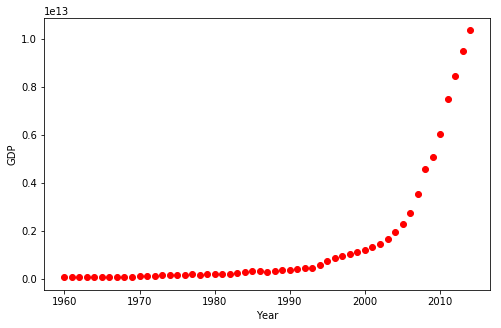

In [9]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

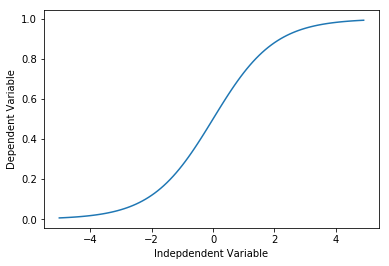

In [10]:
# Choosing a model
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [11]:
# Building the model

def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

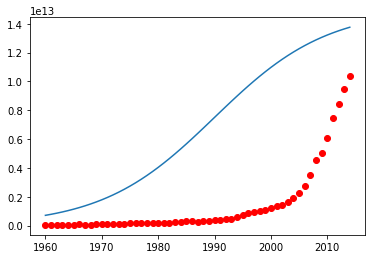

In [13]:
beta_1 = 0.10
beta_2 = 1990.0

y_hat = sigmoid(x_data, beta_1, beta_2)

plt.plot(x_data, y_hat*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [14]:
# nomalize our data
x_norm = x_data/max(x_data)
y_norm = y_data/max(y_data)

#### How we find the best parameters for our fit line?
we can use __curve_fit__ which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(x_norm, *popt) - ydata is minimized.

popt are our optimized parameters.

In [15]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_norm, y_norm)

print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 690.451711, beta_2 = 0.997207


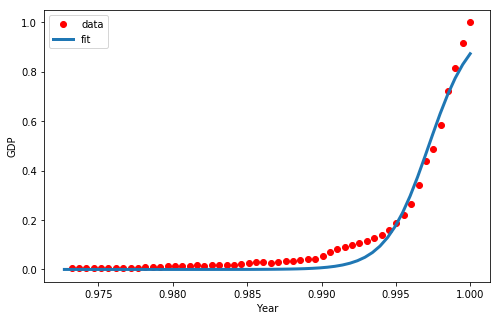

In [16]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)

y = sigmoid(x, *popt)

plt.figure(figsize=(8,5))
plt.plot(x_norm, y_norm, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [25]:
# Evaluation

msk = np.random.rand(len(df)) < 0.8
train_x = x_norm[msk]
test_x = x_norm[~msk]
train_y = y_norm[msk]
test_y = y_norm[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

y_hat = sigmoid(test_x, *popt)

from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y))

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.98
